In [33]:
import numpy as np
import pandas as pd
import os
import random
from PIL import Image
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.optimizers import Adam

In [34]:
data_dir = r"E:\Workstuff\Deep Learning project\Week 1\train"
val_dir = r"E:\Workstuff\Deep Learning project\Week 1\valid"
test_dir=r"E:\Workstuff\Deep Learning project\Week 1\test"

In [35]:
data = ImageDataGenerator( zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2)


train_dg = data.flow_from_directory(data_dir,
                                    class_mode = "categorical",
                                    target_size = (299, 299),
                                    batch_size = 32,
                                    shuffle = False,
                                    seed = 42)

Found 3208 images belonging to 20 classes.


In [36]:
data_val = ImageDataGenerator()
validation_dg = data_val.flow_from_directory(val_dir,
                                      class_mode = "categorical",
                                      target_size = (299, 299),
                                      batch_size = 32,
                                      shuffle = False,
                                      seed = 42)

Found 100 images belonging to 20 classes.


In [37]:
testing_dg = data_val.flow_from_directory(test_dir,
                                      class_mode = "categorical",
                                      target_size = (299, 299),
                                      batch_size = 32,
                                      shuffle = False,
                                      seed = 42)

Found 100 images belonging to 20 classes.


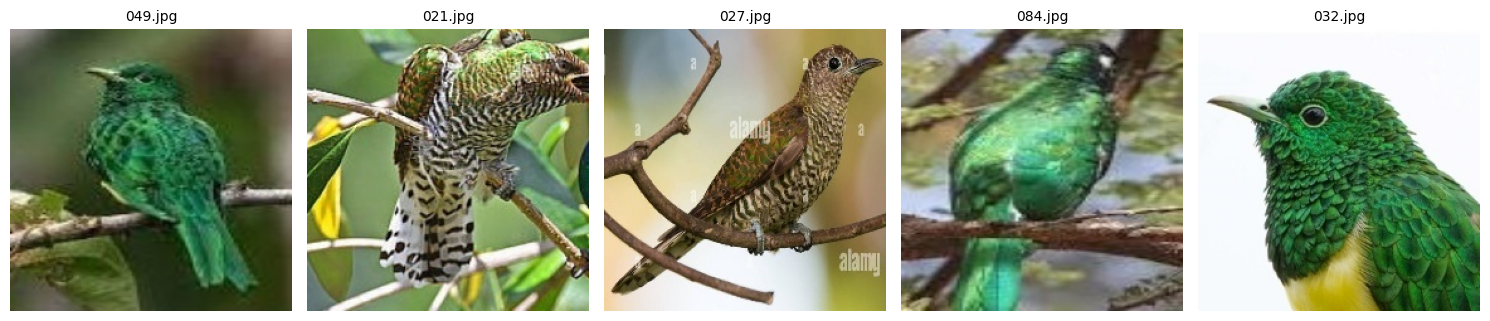

In [38]:
import random
def show_images_with_labels_from_subfolder_name(subfolder_name, num_images=5):
  
  main_folder = data_dir
  subfolder_path = os.path.join(main_folder, subfolder_name)

  if not os.path.exists(subfolder_path):
    print(f"Subfolder '{subfolder_name}' does not exist in the main folder.")
    return

  image_files = [f for f in os.listdir(subfolder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
  random.shuffle(image_files)

  num_images = min(num_images, len(image_files))

  # Set up the plot
  fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=(15, 5))
  if num_images == 1:
    axes = [axes]  
  for i, image_file in enumerate(image_files[:num_images]):
    image_path = os.path.join(subfolder_path, image_file)
    img = Image.open(image_path)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"{os.path.basename(image_file)}", fontsize=10)

  plt.tight_layout()
  plt.show()


show_images_with_labels_from_subfolder_name("AFRICAN EMERALD CUCKOO", num_images=5)
